In [1]:
import tensorflow as tf 
import pandas as pd 
import matplotlib.pyplot as plt

#import the dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #turn all values in these columns into 0 to 1 scale 
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]) 
)

# Create X &y 
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data 
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [3]:
# What does our data look like now
X_train.loc[3]

age                33
sex              male
bmi            22.705
children            0
smoker             no
region      northwest
Name: 3, dtype: object

In [ ]:
print(type(X_train))
print('\n')
print(type(X_train_normal))

In [4]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [5]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [6]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [10]:
# Building the model
# Set the seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10), 
  tf.keras.layers.Dense(1)                                     
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=["mae"])

# 3. Fit the model
history = insurance_model.fit(X_train_normal, y_train, epochs=200)


Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13217.9932 - mae: 13217.9932
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 11378.8037 - mae: 11378.8037
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 8112.9478 - mae: 8112.9478
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 7588.9121 - mae: 7588.9121
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 7103.4785 - mae: 7103.4785
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 6513.8735 - mae: 6513.8735
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 5593.9985 - mae: 5593.9985
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 4434.3398 - mae: 4434.3398
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 3745.8257 - mae: 3745.8257
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 3679.4285 - mae: 3679.

In [11]:
insurance_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3162.5095 - mae: 3162.5095


[3162.509521484375, 3162.509521484375]

Text(0.5, 0, 'epochs')

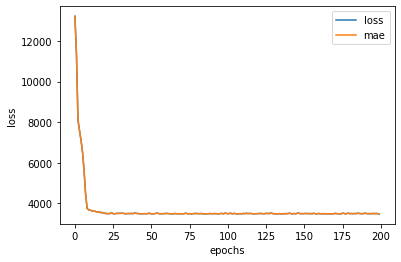

In [12]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")